In [1]:
#Just run this cell!
#Importing packages
import matplotlib
matplotlib.use('Agg')
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# LAB 6: Country Level Rankings Over Time

Building off of the previous notebooks we've been working with, today we'll be using greenhouse gas emissions data from different sectors and countries using satellite data, AI and other measurements from Climate TRACE to see how subsectors have changed *within countries*. Best of luck!

Below is a screenshot from Climate Trace's emissions per country statistics. Feel free to keep exploring this fantastic resource.

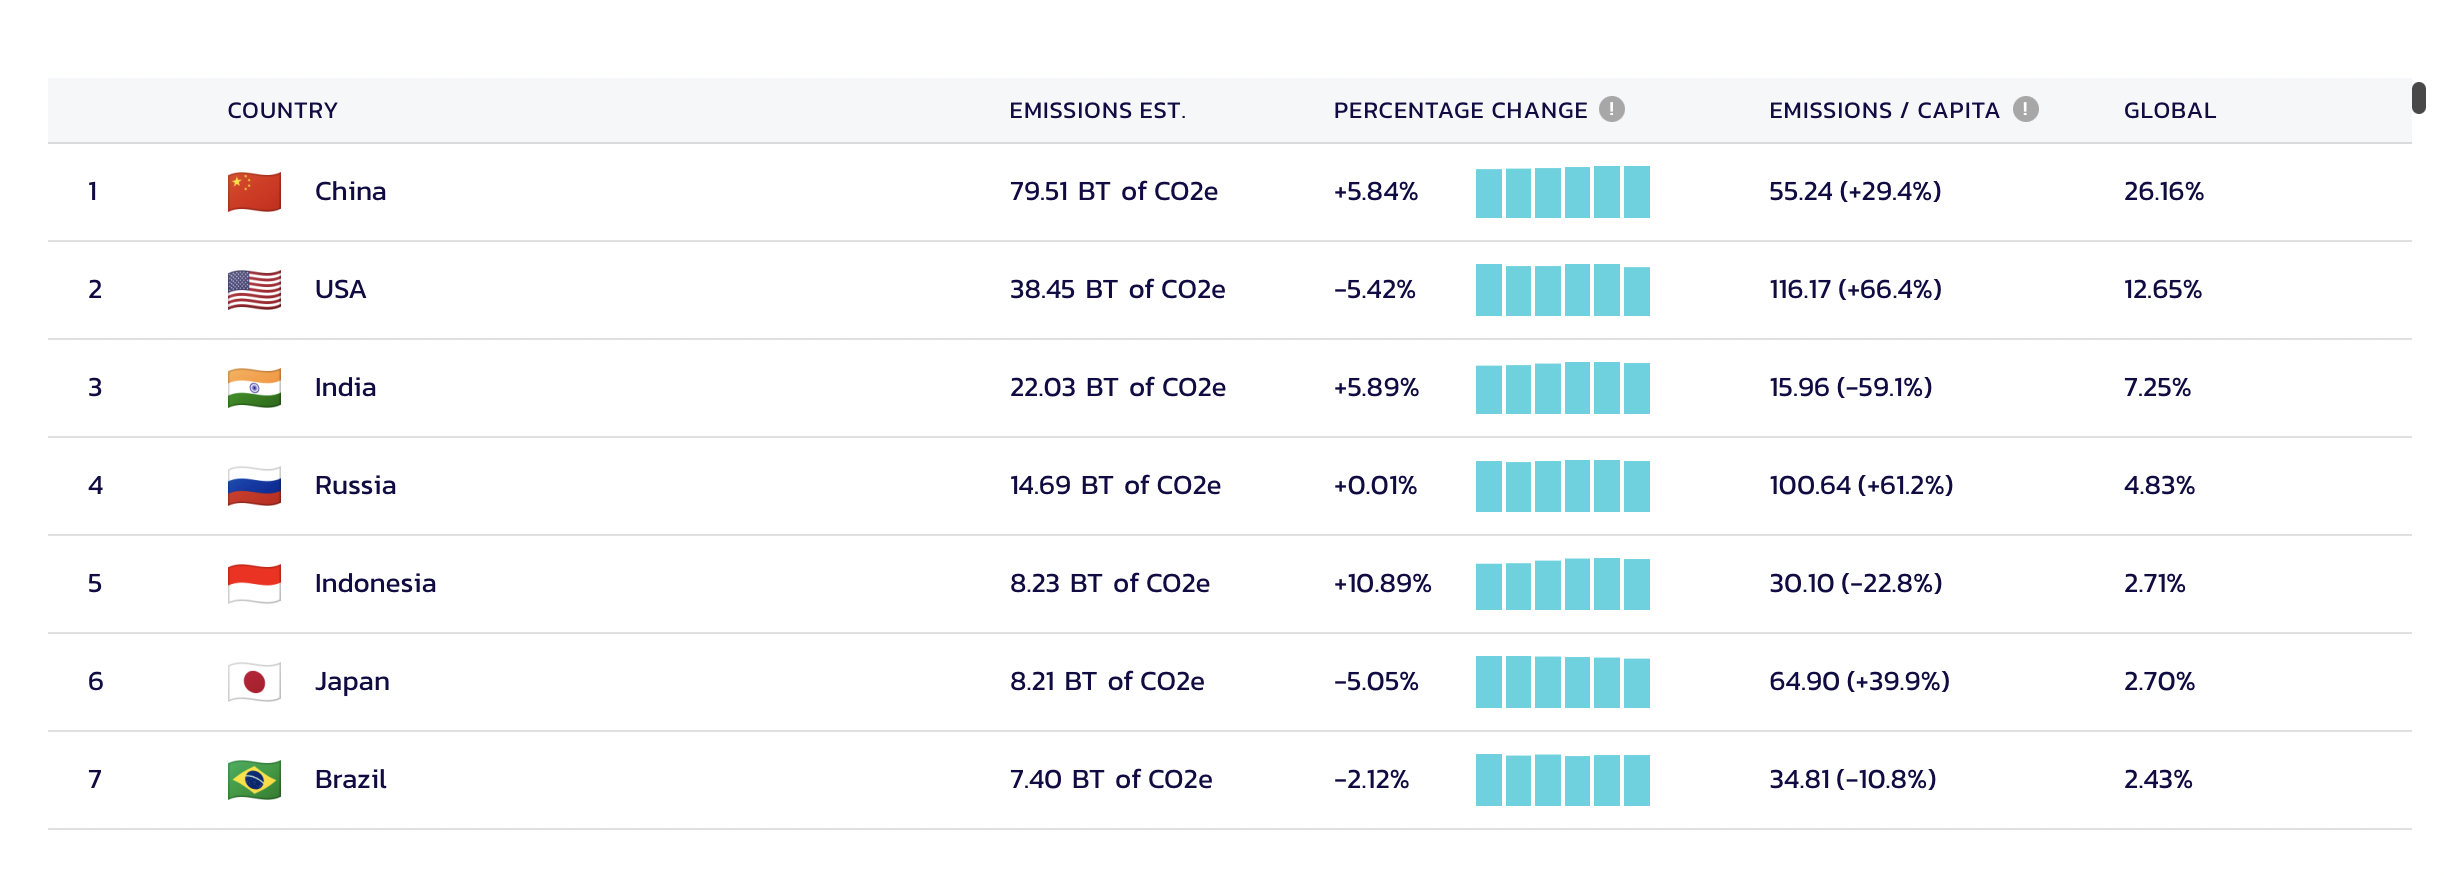

In [2]:
#Just run this cell!
emissions_data = Table.read_table('country_emissions.csv')
emissions_data.show(5)

### Part 1: Emissions over Time

In this section we will be looking at global emissions by year. First, we need to clean our dataset. Looking at the snippet of the `emissions` table above, we can see it has a `start` and `end` column with dates. We want to replace them to create a new column that only contains the year from the `start` column.

**Question 0:** Using 'slicing' that you encountered in the previous lab, write the extract_year function that follows the documentation below:

In [45]:
def extract_year(date):
    """Take in a YYYY-MM-DD string and outputs the year only."""
    return ...

**Question 1:** Use the function above to create a new column `year` that contains the year in the `start` column. The new table `emissions` should also not have the columns `start` or `end`. Hint: You will have to use, `with_columns`, `apply`, and `drop`. It is supposed to look like this:

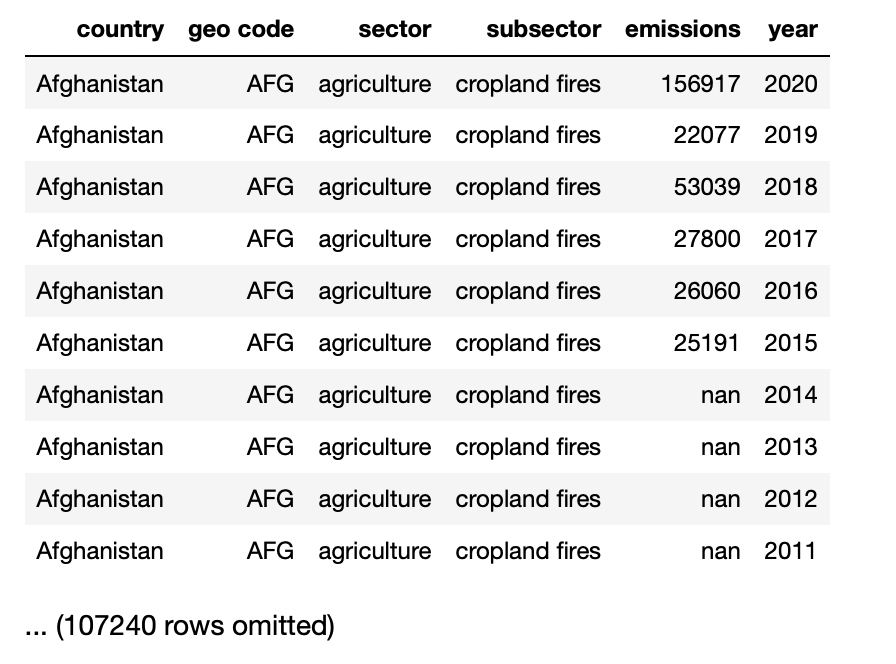

In [5]:
emissions = ...
emissions = ...
emissions

**Question 2:** Now, create a new table, `global_emissions`, that contains the total emissions for each year. The table should have two columns, labelled `year` and `total emissions`. 

*Hint: Look at the documentation for [`np.nansum`](https://numpy.org/doc/stable/reference/generated/numpy.nansum.html). You will have to use this is together with `group`. Remember to relabel your columns!*

In [47]:
global_emission = ...

year,total emissions
2010,0
2011,0
2012,0
2013,0
2014,0
2015,4.9909e+10
2016,4.98833e+10
2017,5.05851e+10
2018,5.13835e+10
2019,5.17246e+10


**Question 3:** We can notice that there is no emissions data between 2010-2014. Create a line plot that displays global emissions from 2015 onwards. Hint: Consider using `take`here!

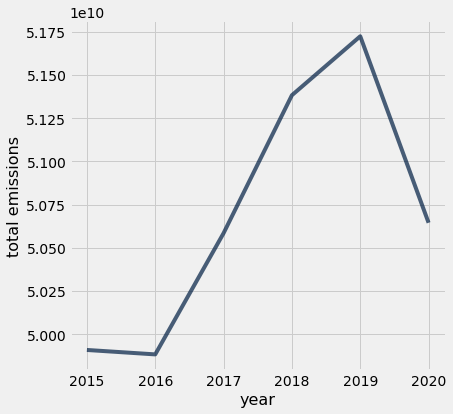

In [48]:
global_emissions_2015_onwards = ...
global_emissions_2015_onwards.plot(...)

**Question 4:** What could be one reason why there a decrease in total global emissions in the year 2020?

*Type your answer here*

### Part 2: Finding which sectors produce the most emissions for each country

Let's look at our original dataset again.

In [49]:
#Just run this cell
emissions.show(5)

country,geo code,sector,subsector,emissions,year
Afghanistan,AFG,agriculture,cropland fires,156917,2020
Afghanistan,AFG,agriculture,cropland fires,22077,2019
Afghanistan,AFG,agriculture,cropland fires,53039,2018
Afghanistan,AFG,agriculture,cropland fires,27800,2017
Afghanistan,AFG,agriculture,cropland fires,26060,2016


In this section we are going to be looking at sector emissions data for each country.

**Question 1:** First let's create a table than only has emissions data for Japan.

The `geo code` column contains the alpha3 code for different countries. You can find country geo codes [here](https://www.geonames.org/countries/). Start off by finding all data for Japan.

In [50]:
japan = emissions...
japan.show(5)

country,geo code,sector,subsector,emissions,year
Japan,JPN,agriculture,cropland fires,23841,2020
Japan,JPN,agriculture,cropland fires,35356,2019
Japan,JPN,agriculture,cropland fires,34618,2018
Japan,JPN,agriculture,cropland fires,25849,2017
Japan,JPN,agriculture,cropland fires,19468,2016


**Question 2:** Create a table that has two columns, `sector` and `emissions nansum` that shows the emissions released by each sector in Japan. The table should be in order from the most emitting sector to the least. It should look like this:

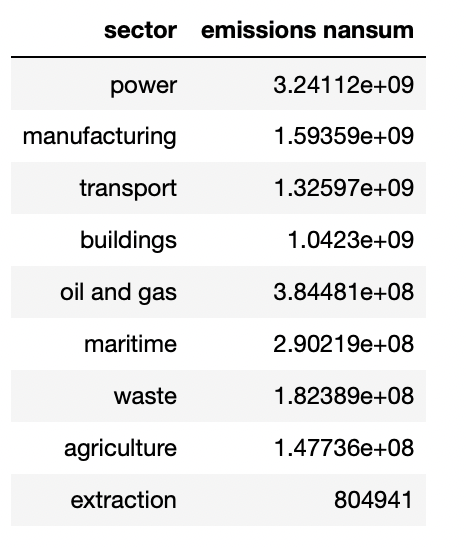

In [8]:
jpn_grouped_sectors = ...
jpn_grouped_sectors

**Question 3:** Now let's include subsector emission contributions. The resulting table should have three columns, `sector`, `subsector`, and `emissions nansum` and should also be sorted in the same way as the table above. Hint: Remember you can use `group` with multiple column names! It should look like this:

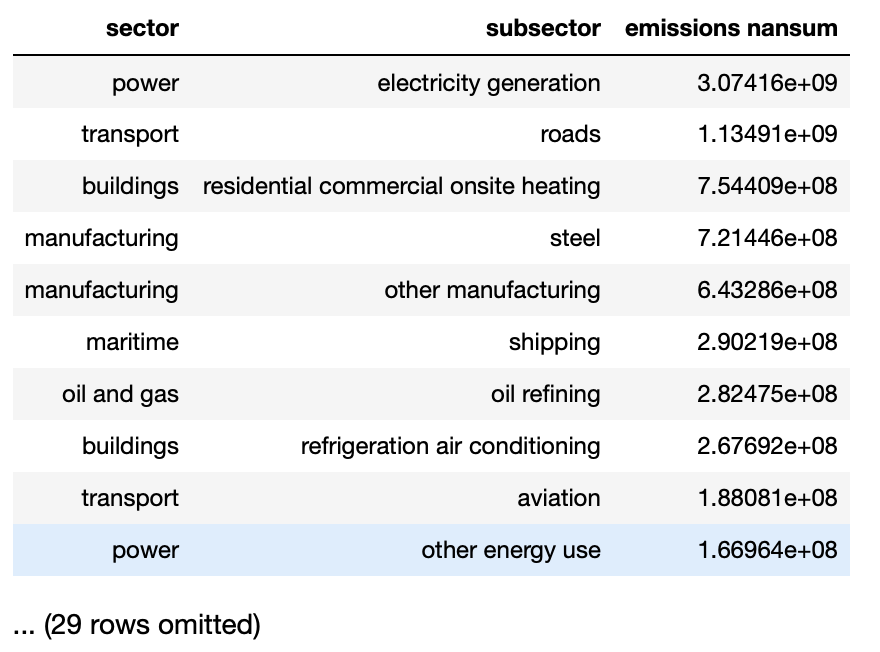

In [9]:
subsectors_jpn = ...
subsectors_jpn

**Question 4:** Taking what you've just done, we are now going to build a function that takes in a country code and outputs the sector (as a string) that produced the most emissions for that country in 2020.

In [53]:
#Functions that takes in a country and outputs the sector and subsector that releases the most emissions in 2020

def most_emissions_sector(country_code):
    country = ...
    country_year = ...
    country_sectors = country_year.select('sector', 'emissions')
    grouped = ...
    highest_sector = ...
    return highest_sector

Next we are going to be using the function defined above to apply it to the all of the geo codes that have emissions data in 2020.

In [54]:
#Just run this cell!
#Extracts geo codes for each country that have emissions data in 2020 
geo_codes = Table().with_column('geo code', np.unique(emissions.where('year', '2020').column('geo code')))

In [10]:
#Just run this cell!
#Finding most emitting sector for each country
#Takes around 50s to run
top_sectors = geo_codes.apply(most_emissions_sector, 'geo code')
country_top_sectors = geo_codes.with_column('top sector', top_sectors)
country_top_sectors.show(5)

**Question 5:** Create a table that has columns `top sector` and `count`, that displays the number of countries that classify a given sector as its most emitting sector 

In [11]:
top_sector_count = ...
top_sector_count

**Question 6:** Create an array that contains all of the countries whose most emitting sector is maritime. Hint: What does `.column` return?

In [12]:
maritime_emission_countries = ...
maritime_emission_countries

**Question 7:** What do we notice about these countries?

*Type your answer here.*

### Part 3: Ranking all countries by total emissions

**Question 1:** Create a table with columns `geo code` and `emissions`, that calculates the total emissions for each country across all sectors in 2019.

In [13]:
country_total_emissions = ...
country_total_emissions

In [14]:
#Just run this cell!
#Removing 0 values from table
country_emissions = Table(['geo code', 'emissions'])
for row_index in np.arange(country_total_emissions.num_rows):
    emissions_val = country_total_emissions.column('emissions')
    if emissions_val.item(row_index) > 0:
        country_emissions = country_emissions.append(country_total_emissions.take(row_index))

country_emissions.show(5)

**Question 2:** Create an array `ranking` of numerical rankings starting from 1 to the number of countries in the `country_emissions` table. Hint: Use `num_rows` and `np.arange`!

In [60]:
ranking = ...

**Question 3:** Create a table that has three columns `geo code`, `emissions`, and `rank`, where rank is the country's ranking in terms of amount of emissions (i.e the most emitting country should have rank 1). The final table should be in order of ranking (first row country should have rank 1). It should look like this:

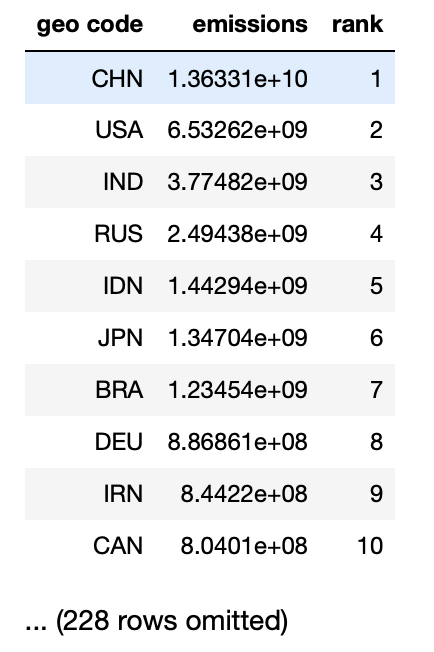

In [61]:
ranked_countries = ...
ranked_countries.show(10)

geo code,emissions,rank
CHN,1.36331e+10,1
USA,6.53262e+09,2
IND,3.77482e+09,3
RUS,2.49438e+09,4
IDN,1.44294e+09,5
JPN,1.34704e+09,6
BRA,1.23454e+09,7
DEU,8.86861e+08,8
IRN,8.4422e+08,9
CAN,8.0401e+08,10


**Question 4:** Fill in the blanks to calculate the statistics below to compare the total emissions of top 10 countries with all tf the remaining countries with a ranking above 10.

In [62]:
#Calculate the total emissions produced from the top 10 most emitting countries in 2019
total_emissions_10 = ...
#Calculate the total emissions produced from all of the countries ranked above 10 in 2019
total_emissions_above10 = ...
#Calculate the total emissions produced by all countries in 2019
total_emissions_all = ...

top10_emission_percent = np.round(100*total_emissions_10/total_emissions_all, 2)
top10_above10_fraction = np.round(total_emissions_10/total_emissions_above10, 2)

"The top 10 most polluting countries contributed to {0}% of all emissions. This was {1} times the emissions of all other countries combined.".format(top10_emission_percent, top10_above10_fraction)

'The top 10 most polluting countries contributed to 63.79% of all emissions. This was 1.76 times the emissions of all other countries combined.'

## Part 4: Mapping countries by emissions

In this next section we will map the countries from `country_emissions` and show their relative emissions.

**Question 1:** Replace the `emissions` column in `country_emissions` and replace it with `log emissions`, which is the log of `emissions`.

In [15]:
emissions_logged = np.log(...)
logged_country_emissions = country_emissions.drop('emissions').with_column('log emissions', emissions_logged)
logged_country_emissions.show(5)

In [64]:
#Just run this cell
#Importing packages and data
import os
import folium

geo = 'world-countries.json'
country_emissions_pd = logged_country_emissions.to_df()

Here, we use the folium package to set up a map of the emissions data we just worked through. Super cool! You might have to press `Trust Notebook` or `Not Trusted` in the upper right corner for it to work. If that does not work, make an ed post. You will not be deducted points if it is a technical glitch prohibiting you from viewing the map.

In [65]:
#Just run this cell
#Building folium map
emissions_map = folium.Map(location=[0, 0], zoom_start=0, max_bounds=True)

emissions_map.choropleth(geo_data=geo, data=country_emissions_pd,
             columns=['geo code', 'log emissions'],
             key_on='feature.id', 
             fill_color='PuBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Log Emissions')

emissions_map

/Users/kinseylong/miniconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


**Question 2**: Why are some countries filled in black? What geographical trends do you notice?

*Type your answer here.*

Congratulations on finishing your lab. You have all reason to be proud of yourself. **This was a challenging one!**

Now, please save this file as PDF via HTML and upload it to the bCourses assignment.

*Developed by Caitlin Yee, Kinsey Long, Aaron Moore and Peter F. Grinde-Hollevik*